In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor #GB
from sklearn.model_selection import validation_curve #krzywa walidacji

In [2]:
my_data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep = ',')

In [3]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
my_data=my_data.dropna()

<AxesSubplot:>

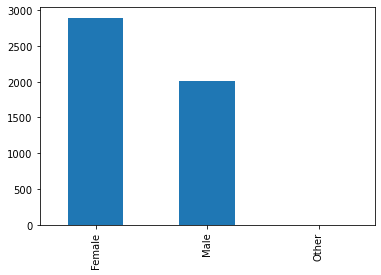

In [5]:
my_data["gender"].value_counts().plot(kind='bar') # nie chciał konwertować na int64 -> bo jest 1 wartość other, która nie była widoczna

In [6]:
my_data["gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [7]:
my_data = my_data.query('gender != "Other"')

In [8]:
mapper = {'Female':1,'Male':0}
my_data['gender'] = my_data['gender'].replace(mapper)
my_data.gender = my_data.gender.astype('int64')

mapper2 = {'Yes':1,'No':0}
my_data['ever_married'] = my_data['ever_married'].replace(mapper2)

pd.get_dummies(my_data, columns = ['work_type'])
my_data = pd.get_dummies(my_data, columns = ['work_type'], drop_first=True); 

pd.get_dummies(my_data, columns = ['smoking_status'])
my_data = pd.get_dummies(my_data, columns = ['smoking_status'], drop_first=True); 

mapper = {'Urban':1,'Rural':0}
my_data['Residence_type'] = my_data['Residence_type'].replace(mapper)

In [9]:
my_data = my_data.rename(columns={'hypertension':'hpts',
'heart_disease':'hrtDs',
'ever_married':'evrMrrd',
'Residence_type':'rsdTp',
'avg_glucose_level':'avgGlcs',
'work_type_Never_worked':'wrkN',
'work_type_Private':'wrkP',
'work_type_Self-employed':'wrkSE',
'work_type_children':'wrkC',
'smoking_status_formerly smoked':'smkdF',
'smoking_status_never smoked':'smkdN',
'smoking_status_smokes':'smks'})

In [10]:
my_data=my_data[['gender','age','hpts','hrtDs','evrMrrd','rsdTp','avgGlcs','bmi','wrkN','wrkP','wrkSE','wrkC','smkdF','smkdN','smks','stroke']]

In [11]:
nrows = my_data.shape[0]
ncols = my_data.shape[1]

In [12]:
X = my_data.iloc[:,0:(ncols-1)]

In [13]:
y = my_data.iloc[:,ncols-1:ncols]

In [14]:
my_data

,gender,age,hpts,hrtDs,evrMrrd,rsdTp,avgGlcs,bmi,wrkN,wrkP,wrkSE,wrkC,smkdF,smkdN,smks,stroke
0,0,67.0,0,1,1,1,228.69,36.6,0,1,0,0,1,0,0,1
2,0,80.0,0,1,1,0,105.92,32.5,0,1,0,0,0,1,0,1
3,1,49.0,0,0,1,1,171.23,34.4,0,1,0,0,0,0,1,1
4,1,79.0,1,0,1,0,174.12,24.0,0,0,1,0,0,1,0,1
5,0,81.0,0,0,1,1,186.21,29.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,0,0,103.08,18.6,0,0,0,1,0,0,0,0
5106,1,81.0,0,0,1,1,125.20,40.0,0,0,1,0,0,1,0,0
5107,1,35.0,0,0,1,0,82.99,30.6,0,0,1,0,0,1,0,0
5108,0,51.0,0,0,1,0,166.29,25.6,0,1,0,0,1,0,0,0


In [15]:
X.columns

Index(['gender', 'age', 'hpts', 'hrtDs', 'evrMrrd', 'rsdTp', 'avgGlcs', 'bmi',
       'wrkN', 'wrkP', 'wrkSE', 'wrkC', 'smkdF', 'smkdN', 'smks'],
      dtype='object')

In [16]:
y.columns

Index(['stroke'], dtype='object')

In [17]:
y=np.ravel(y, order='C')

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   4908 non-null   int64  
 1   age      4908 non-null   float64
 2   hpts     4908 non-null   int64  
 3   hrtDs    4908 non-null   int64  
 4   evrMrrd  4908 non-null   int64  
 5   rsdTp    4908 non-null   int64  
 6   avgGlcs  4908 non-null   float64
 7   bmi      4908 non-null   float64
 8   wrkN     4908 non-null   uint8  
 9   wrkP     4908 non-null   uint8  
 10  wrkSE    4908 non-null   uint8  
 11  wrkC     4908 non-null   uint8  
 12  smkdF    4908 non-null   uint8  
 13  smkdN    4908 non-null   uint8  
 14  smks     4908 non-null   uint8  
dtypes: float64(3), int64(5), uint8(7)
memory usage: 378.6 KB


In [21]:
# y.info() # 'numpy.ndarray' object has no attribute 'info'

In [19]:
def krzywa_walidacji(parametry, train_scores, test_scores):
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)#odchylenie standardowe liczb od ich śr. aryt., to pierwiastek kwadratowy z wariancji

    #uczenie
    plt.plot(parametry, train_mean, color='blue',
            marker='3', markersize=5, label='Dokładność uczenia')
    plt.fill_between(parametry, train_mean+train_std, train_mean-train_std, alpha=0.20,
                    color='red')
    #walidacja
    plt.plot(parametry, test_mean, color='green', linestyle='--',
            marker='4', markersize=5, label='Dokładność walidacji')
    plt.fill_between(parametry, test_mean+test_std, test_mean-test_std, alpha=0.20,
                    color='yellow')
    #parametry pozostałe
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Wartość testowanego parametru')
    plt.ylabel('neg_mean_squared_error')
    plt.show()


In [20]:
#Dzielimy zbiór na uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

#tworzymy pipline najpierw wystandaryzujemy nasze zmienne potem użyjemy gradientboosta
pipe = Pipeline([('ss', StandardScaler()),
                 ('gb',GradientBoostingRegressor())])

# Standaryzacja – normalizacja zm. los., kt. uzyskuje śr. wart. oczek. 0 i i odch. std 1

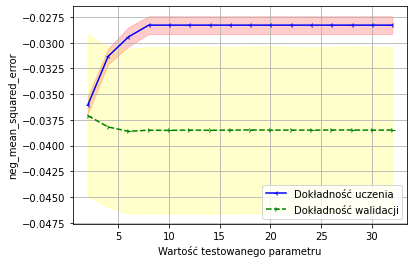

In [24]:
#nasze parametry, których optymalną wartość chcemy poznać
max_leaf = list(range(2,33,2))

#krzywa walidacji
train_score, test_score = validation_curve(estimator=pipe,
                                           X=X_train,
                                          y=y_train,
                                          param_name='gb__max_leaf_nodes',
                                          param_range=max_leaf,
                                          cv=10,
                                          scoring='neg_mean_squared_error')

krzywa_walidacji(max_leaf, train_score, test_score)


# A column-vector y was passed when a 1d array was expected. 
# Please change the shape of y to (n_samples, ), for example using ravel().

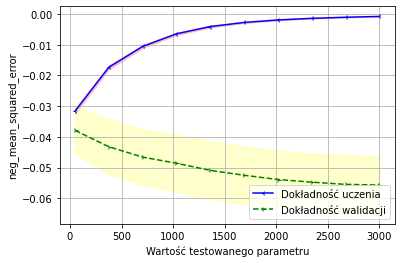

In [25]:
#nasze parametry, których optymalną wartość chcemy poznać
n_trees = list(np.linspace(50,3000,10).astype('int')) #10 roznych wartosci drzew od 50 do 3000

#krzywa walidacji
train_score, test_score = validation_curve(estimator=pipe,
                                           X=X_train,
                                          y=y_train,
                                          param_name='gb__n_estimators',
                                          param_range=n_trees,
                                          cv=10,
                                          scoring='neg_mean_squared_error')

krzywa_walidacji(n_trees, train_score, test_score)


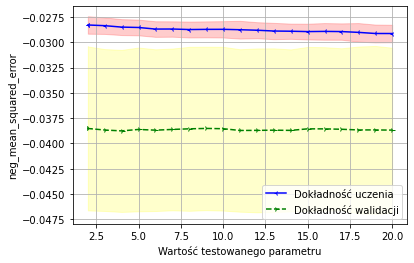

In [26]:
#nasze parametry, których optymalną wartość chcemy poznać
min_samples = list(np.linspace(2,20, 20).astype('int'))
#list(np.linspace(2,20, 20).round(2))
#krzywa walidacji
train_score, test_score = validation_curve(estimator=pipe,
                                           X=X_train,
                                          y=y_train,
                                          param_name='gb__min_samples_split',
                                          param_range=min_samples,
                                          cv=10,
                                          scoring='neg_mean_squared_error')

krzywa_walidacji(min_samples, train_score, test_score)



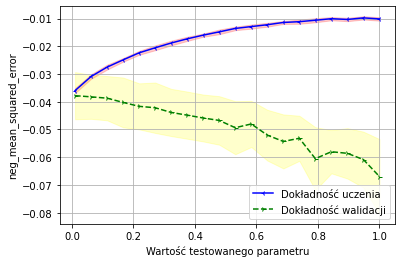

In [27]:
#nasze parametry, których optymalną wartość chcemy poznać
learning_rate = list(np.linspace(0.01, 1, 20))
#krzywa walidacji
train_score, test_score = validation_curve(estimator=pipe,
                                           X=X_train,
                                          y=y_train,
                                          param_name='gb__learning_rate',
                                          param_range=learning_rate,
                                          cv=10,
                                          scoring='neg_mean_squared_error')

krzywa_walidacji(learning_rate, train_score, test_score)



In [21]:
min_samples = [2,3,5,10,15]
max_leaf = [2,3,5,10,20]
n_trees = [5,10,50,100]
lr = [0.001,0.01,0.1,0.2,0.7]

#max_leaf 2-33
#n_trees 50-3000
#min_samples 2,20
#learning_rate 0.01, 1

params = [{'gb__min_samples_split': min_samples,
          'gb__max_leaf_nodes': max_leaf,
          'gb__max_features':['log2'],
          'gb__learning_rate':lr,
          'gb__n_estimators': n_trees}]

grid_search = GridSearchCV(estimator=pipe,
                          param_grid=params,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs=-1)

gs = grid_search.fit(X_train,y_train)

print("Najlepszy wynik: {}".format(gs.best_score_))
print("Najlepsza konfiguracja: ")
gs.best_params_

Najlepszy wynik: -0.038275601911922634
Najlepsza konfiguracja: 


{'gb__learning_rate': 0.2,
 'gb__max_features': 'log2',
 'gb__max_leaf_nodes': 2,
 'gb__min_samples_split': 5,
 'gb__n_estimators': 50}

In [22]:
gs.cv_results_

{'mean_fit_time': array([0.0208005 , 0.03580203, 0.09820561, 0.17781029, 0.02240129,
        0.02980165, 0.09380536, 0.17941036, 0.02200122, 0.02820158,
        0.1028059 , 0.17040977, 0.03040175, 0.04860282, 0.09280534,
        0.30481758, 0.02220135, 0.02880158, 0.08920512, 0.16400933,
        0.02100124, 0.03100181, 0.10380597, 0.19721127, 0.02200131,
        0.02940173, 0.10800624, 0.25461454, 0.02120118, 0.02960167,
        0.12740717, 0.20221162, 0.02100134, 0.0304018 , 0.09960575,
        0.19481115, 0.02140136, 0.0298017 , 0.10360589, 0.18501058,
        0.02260137, 0.03120184, 0.11100636, 0.2006114 , 0.02200131,
        0.03220186, 0.10620608, 0.20761175, 0.02100134, 0.03280196,
        0.11620655, 0.20361156, 0.02340136, 0.03160176, 0.11200643,
        0.21081223, 0.02220135, 0.03200188, 0.10340595, 0.21281223,
        0.02200117, 0.03240194, 0.11020627, 0.21041198, 0.02240119,
        0.03600206, 0.1098063 , 0.21621227, 0.0260016 , 0.03260183,
        0.11460652, 0.20981197,

In [23]:
from sklearn.metrics import mean_squared_error
gb = gs.best_estimator_
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print("Mse testu: {}".format(-mean_squared_error(y_test,y_pred)))

Mse testu: -0.031950815467394096
